<h1>Hand On Exam</h1>
<hr>
<h3>RALPH RICHMOND D. AMARILLO</h3>
<h3>BSIT-3B</h3>

<h6>
<strong>Data Visualization: Provide Visualization each Insights.</strong>
</h6>

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from folium.plugins import HeatMap
import seaborn as sns

In [2]:
crime = pd.read_csv('datasets\\chicago_2001_present.csv')

In [3]:
crime

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,13311263,JG503434,07/29/2022 03:39:00 AM,023XX S TROY ST,1582,OFFENSE INVOLVING CHILDREN,CHILD PORNOGRAPHY,RESIDENCE,True,False,...,25.0,30.0,17,NaN,NaN,2022,04/18/2024 03:40:59 PM,NaN,NaN,NaN
1,13053066,JG103252,01/03/2023 04:44:00 PM,039XX W WASHINGTON BLVD,2017,NARCOTICS,MANUFACTURE / DELIVER - CRACK,SIDEWALK,True,False,...,28.0,26.0,18,NaN,NaN,2023,01/20/2024 03:41:12 PM,NaN,NaN,NaN
2,12131221,JD327000,08/10/2020 09:45:00 AM,015XX N DAMEN AVE,0326,ROBBERY,AGGRAVATED VEHICULAR HIJACKING,STREET,True,False,...,1.0,24.0,03,1162795.0,1909900.0,2020,05/17/2025 03:40:52 PM,41.908418,-87.677407,"(41.908417822, -87.67740693)"
3,11227634,JB147599,08/26/2017 10:00:00 AM,001XX W RANDOLPH ST,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,HOTEL/MOTEL,False,False,...,42.0,32.0,02,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN
4,13203321,JG415333,09/06/2023 05:00:00 PM,002XX N Wells st,1320,CRIMINAL DAMAGE,TO VEHICLE,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,...,42.0,32.0,14,1174694.0,1901831.0,2023,11/04/2023 03:40:18 PM,41.886018,-87.633938,"(41.886018055, -87.633937881)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8410193,13973682,JJ422722,09/20/2025 09:30:00 PM,060XX N ARTESIAN AVE,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,...,40.0,2.0,07,1158892.0,1940132.0,2025,09/28/2025 03:42:59 PM,41.991457,-87.690912,"(41.99145724, -87.690912186)"
8410194,13973492,JJ422488,09/20/2025 11:30:00 PM,004XX N PEORIA ST,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,...,27.0,24.0,07,1170336.0,1902935.0,2025,09/28/2025 03:42:59 PM,41.889144,-87.649909,"(41.889143855, -87.649909004)"
8410195,13973306,JJ422245,09/20/2025 07:08:00 PM,107XX S PRAIRIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,True,True,...,9.0,49.0,08A,1179819.0,1833810.0,2025,09/28/2025 03:42:59 PM,41.699246,-87.617199,"(41.699245987, -87.61719874)"
8410196,13973002,JJ422001,09/20/2025 03:55:00 PM,034XX W 63RD ST,2024,NARCOTICS,POSSESS - HEROIN (WHITE),POLICE FACILITY / VEHICLE PARKING LOT,True,False,...,14.0,66.0,18,1154582.0,1862632.0,2025,09/28/2025 03:42:59 PM,41.778877,-87.708840,"(41.778877155, -87.708840106)"


In [4]:
crime.describe()

,ID,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
count,8.410198e+06,8.410198e+06,8.410151e+06,7.795376e+06,7.796511e+06,8.316513e+06,8.316513e+06,8.410198e+06,8.316513e+06,8.316513e+06
mean,7.506417e+06,1.183592e+03,1.129624e+01,2.278485e+01,3.738321e+01,1.164655e+06,1.885910e+06,2.010984e+03,4.184253e+01,-8.767129e+01
std,3.776056e+06,7.037035e+02,6.963286e+00,1.385829e+01,2.154697e+01,1.695337e+04,3.243238e+04,7.057827e+00,8.923247e-02,6.143601e-02
min,6.340000e+02,1.110000e+02,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.001000e+03,3.661945e+01,-9.168657e+01
25%,4.057425e+06,6.210000e+02,6.000000e+00,1.000000e+01,2.300000e+01,1.153071e+06,1.859206e+06,2.005000e+03,4.176894e+01,-8.771335e+01
50%,7.505136e+06,1.034000e+03,1.000000e+01,2.300000e+01,3.200000e+01,1.166207e+06,1.891022e+06,2.010000e+03,4.185656e+01,-8.766556e+01
75%,1.089433e+07,1.731000e+03,1.700000e+01,3.400000e+01,5.600000e+01,1.176401e+06,1.909404e+06,2.017000e+03,4.190708e+01,-8.762807e+01
max,1.398087e+07,2.535000e+03,3.100000e+01,5.000000e+01,7.700000e+01,1.205119e+06,1.951622e+06,2.025000e+03,4.202291e+01,-8.752453e+01


In [5]:
crime.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,8410198.0,7.506417e+06,3.776056e+06,634.000000,4.057425e+06,7.505136e+06,1.089433e+07,1.398087e+07
Beat,8410198.0,1.183592e+03,7.037035e+02,111.000000,6.210000e+02,1.034000e+03,1.731000e+03,2.535000e+03
District,8410151.0,1.129624e+01,6.963286e+00,1.000000,6.000000e+00,1.000000e+01,1.700000e+01,3.100000e+01
Ward,7795376.0,2.278485e+01,1.385829e+01,1.000000,1.000000e+01,2.300000e+01,3.400000e+01,5.000000e+01
Community Area,7796511.0,3.738321e+01,2.154697e+01,0.000000,2.300000e+01,3.200000e+01,5.600000e+01,7.700000e+01
X Coordinate,8316513.0,1.164655e+06,1.695337e+04,0.000000,1.153071e+06,1.166207e+06,1.176401e+06,1.205119e+06
Y Coordinate,8316513.0,1.885910e+06,3.243238e+04,0.000000,1.859206e+06,1.891022e+06,1.909404e+06,1.951622e+06
Year,8410198.0,2.010984e+03,7.057827e+00,2001.000000,2.005000e+03,2.010000e+03,2.017000e+03,2.025000e+03
Latitude,8316513.0,4.184253e+01,8.923247e-02,36.619446,4.176894e+01,4.185656e+01,4.190708e+01,4.202291e+01
Longitude,8316513.0,-8.767129e+01,6.143601e-02,-91.686566,-8.771335e+01,-8.766556e+01,-8.762807e+01,-8.752453e+01


In [6]:
crime.isnull().sum()

ID                           0
Case Number                  0
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description     14893
Arrest                       0
Domestic                     0
Beat                         0
District                    47
Ward                    614822
Community Area          613687
FBI Code                     0
X Coordinate             93685
Y Coordinate             93685
Year                         0
Updated On                   0
Latitude                 93685
Longitude                93685
Location                 93685
dtype: int64

In [7]:
crime.info

<bound method DataFrame.info of                ID Case Number                    Date  \
0        13311263    JG503434  07/29/2022 03:39:00 AM   
1        13053066    JG103252  01/03/2023 04:44:00 PM   
2        12131221    JD327000  08/10/2020 09:45:00 AM   
3        11227634    JB147599  08/26/2017 10:00:00 AM   
4        13203321    JG415333  09/06/2023 05:00:00 PM   
...           ...         ...                     ...   
8410193  13973682    JJ422722  09/20/2025 09:30:00 PM   
8410194  13973492    JJ422488  09/20/2025 11:30:00 PM   
8410195  13973306    JJ422245  09/20/2025 07:08:00 PM   
8410196  13973002    JJ422001  09/20/2025 03:55:00 PM   
8410197  13972730    JJ421679  09/20/2025 08:20:00 AM   

                           Block  IUCR                Primary Type  \
0                023XX S TROY ST  1582  OFFENSE INVOLVING CHILDREN   
1        039XX W WASHINGTON BLVD  2017                   NARCOTICS   
2              015XX N DAMEN AVE  0326                     ROBBERY   
3  

In [8]:
crime['Date'] = crime['Date'].astype(str)
crime['Date'] = crime['Date'].apply(lambda x: x.replace('/', '-') if pd.notnull(x) else x)
crime['Date'] = crime['Date'].apply(lambda x: x.strip() if pd.notnull(x) else x)                                
crime['Date'] = pd.to_datetime(crime['Date'], dayfirst=True, errors='coerce')

crime.dtypes
crime.isnull().sum()

crime['Year'] = crime['Date'].dt.year
crime['Month'] =  crime['Date'].dt.month
crime['Day'] =  crime['Date'].dt.day
crime['DayOfWeek'] =  crime['Date'].dt.dayofweek
crime.isnull().sum()

ID                           0
Case Number                  0
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description     14893
Arrest                       0
Domestic                     0
Beat                         0
District                    47
Ward                    614822
Community Area          613687
FBI Code                     0
X Coordinate             93685
Y Coordinate             93685
Year                         0
Updated On                   0
Latitude                 93685
Longitude                93685
Location                 93685
Month                        0
Day                          0
DayOfWeek                    0
dtype: int64

In [9]:
crime['Date'] = crime['Date'].astype('str')
crime['Date'] = crime['Date'].str.strip()
crime['Date'] = crime['Date'].str.replace('/', '-')

In [10]:
crime['Date'] = pd.to_datetime(crime['Date'], dayfirst = True, errors = 'coerce')

In [11]:
crime.dtypes

ID                               int64
Case Number                     object
Date                    datetime64[ns]
Block                           object
IUCR                            object
Primary Type                    object
Description                     object
Location Description            object
Arrest                            bool
Domestic                          bool
Beat                             int64
District                       float64
Ward                           float64
Community Area                 float64
FBI Code                        object
X Coordinate                   float64
Y Coordinate                   float64
Year                             int32
Updated On                      object
Latitude                       float64
Longitude                      float64
Location                        object
Month                            int32
Day                              int32
DayOfWeek                        int32
dtype: object

In [12]:
severity3 = crime.groupby(['Primary Type', 'Year']).size()
severity3.reset_index()

,Primary Type,Year,0
0,ARSON,2001,1011
1,ARSON,2002,1032
2,ARSON,2003,955
3,ARSON,2004,778
4,ARSON,2005,691
...,...,...,...
763,WEAPONS VIOLATION,2021,8979
764,WEAPONS VIOLATION,2022,8781
765,WEAPONS VIOLATION,2023,8608
766,WEAPONS VIOLATION,2024,7839


<h2>INSIGHTS : 35</h2>

<h2>Question 1: Which year had the most reported crimes?</h2>

In [13]:
crimes_per_year = crime.groupby('Year').size().reset_index(name='Total Crimes')
crimes_per_year.sort_values('Total Crimes', ascending=False)

,Year,Total Crimes
1,2002,486830
0,2001,485954
2,2003,475996
3,2004,469439
4,2005,453785
5,2006,448198
6,2007,437105
7,2008,427211
8,2009,392859
9,2010,370555


<hr>
<h2>Question 2: Which month shows the highest concentration of crimes across all years?</h2>

In [14]:
crimes_per_month = crime.groupby('Month').size().reset_index(name='Total Crimes')
crimes_per_month.sort_values('Total Crimes', ascending=False)

,Month,Total Crimes
6,7,787986
7,8,778827
5,6,748862
4,5,748780
8,9,727097
9,10,722062
2,3,691342
3,4,688252
0,1,661245
10,11,650342


<hr>
<h2>Question 3: On which day of the week are crimes most frequently reported?</h2>

In [15]:
crimes_per_day = crime.groupby('DayOfWeek').size().reset_index(name='Total Crimes')
crimes_per_day.sort_values('Total Crimes', ascending=False)

,DayOfWeek,Total Crimes
4,4,1261341
2,2,1208169
5,5,1206357
1,1,1200628
3,3,1196290
0,0,1189517
6,6,1147896


<hr>
<h2>Question 4: What are the top 10 most frequently reported crime types in Chicago?</h2>

In [16]:
common_crimes = crime.groupby('Primary Type').size().reset_index(name='Total Crimes')
common_crimes.sort_values('Total Crimes', ascending=False).head(10)

,Primary Type,Total Crimes
32,THEFT,1785150
2,BATTERY,1532491
6,CRIMINAL DAMAGE,956346
19,NARCOTICS,763342
1,ASSAULT,563123
24,OTHER OFFENSE,524325
3,BURGLARY,444757
18,MOTOR VEHICLE THEFT,429681
9,DECEPTIVE PRACTICE,387055
29,ROBBERY,314286


<hr>
<h2>Question 5: How many crimes resulted in an arrest compared to those that did not?</h2>

In [17]:
arrest_counts = crime.groupby('Arrest').size().reset_index(name='Total Cases')
arrest_counts

,Arrest,Total Cases
0,False,6287066
1,True,2123132


<hr>
<h2>Question 6: Which 10 locations report the most crime incidents?</h2>

In [18]:
crime_locations = crime.groupby('Location Description').size().reset_index(name='Total Crimes')
crime_locations.sort_values('Total Crimes', ascending=False).head(10)

,Location Description,Total Crimes
190,STREET,2197287
161,RESIDENCE,1381812
17,APARTMENT,998492
185,SIDEWALK,761765
141,OTHER,269939
149,PARKING LOT/GARAGE(NON.RESID.),202930
15,ALLEY,187348
186,SMALL RETAIL STORE,168926
182,"SCHOOL, PUBLIC, BUILDING",146368
168,RESTAURANT,141262


<hr>
<h2>Question 7: Which crime types are most likely to result in an arrest?</h2>

In [19]:
arrest_by_type = crime.groupby('Primary Type')['Arrest'].mean().reset_index(name='Arrest Rate')
arrest_by_type.sort_values('Arrest Rate', ascending=False).head(10)

,Primary Type,Arrest Rate
10,DOMESTIC VIOLENCE,1.000000
25,PROSTITUTION,0.995583
19,NARCOTICS,0.993468
11,GAMBLING,0.992703
17,LIQUOR LAW VIOLATION,0.990115
26,PUBLIC INDECENCY,0.981395
4,CONCEALED CARRY LICENSE VIOLATION,0.965707
14,INTERFERENCE WITH PUBLIC OFFICER,0.916336
21,OBSCENITY,0.738947
33,WEAPONS VIOLATION,0.725967


<hr>
<h2>Question 8: What is the distribution of crimes across different times of the day?</h2>

In [20]:
crime['Hour'] = crime['Date'].dt.hour
hourly_trends = crime.groupby('Hour').size().reset_index(name='Total Crimes')
hourly_trends

,Hour,Total Crimes
0,0,490142
1,1,267704
2,2,226631
3,3,184422
4,4,141052
5,5,118313
6,6,136726
7,7,193660
8,8,284850
9,9,362414


<hr>
<h2>Question 9: Which locations are more likely to have domestic-related crimes?</h2>

In [21]:
domestic_locations = crime[crime['Domestic'] == True].groupby('Location Description').size().reset_index(name='Domestic Crimes')
domestic_locations.sort_values('Domestic Crimes', ascending=False).head(10)

,Location Description,Domestic Crimes
126,RESIDENCE,529034
17,APARTMENT,469727
152,STREET,179492
147,SIDEWALK,83457
130,RESIDENCE PORCH/HALLWAY,22517
112,OTHER,18737
36,CHA APARTMENT,17562
165,VEHICLE NON-COMMERCIAL,16951
15,ALLEY,16566
120,PARKING LOT/GARAGE(NON.RESID.),10278


<hr>
<h2>Question 10: Which FBI crime codes are reported most frequently in Chicago?</h2>

In [22]:
fbi_crimes = crime['FBI Code'].value_counts().head(10).reset_index()
fbi_crimes.columns = ['FBI Code', 'Number of Crimes']
fbi_crimes

,FBI Code,Number of Crimes
0,06,1788058
1,08B,1316358
2,14,956346
3,18,762366
4,26,604360
5,08A,575660
6,05,441849
7,07,429681
8,11,334668
9,03,314286


<hr>
<h2>Question 11: Based on the dataset, which month recorded the highest number of crimes, and what are the Top 3 most common crime types in that month?</h2>

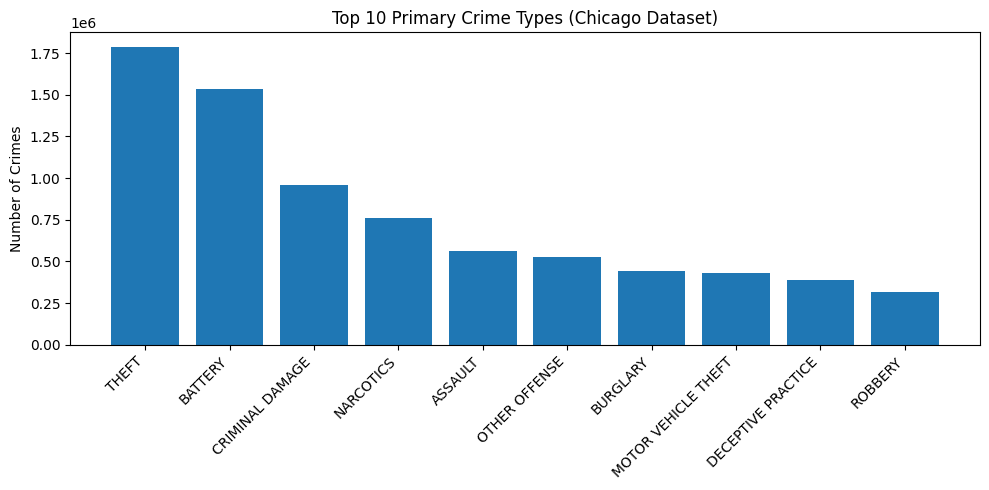

In [43]:
top_types = crime['Primary Type'].value_counts().head(10).reset_index()
top_types.columns = ['Primary Type', 'Count']
plt.figure(figsize=(10,5))
plt.bar(top_types['Primary Type'], top_types['Count'])
plt.title('Top 10 Primary Crime Types (Chicago Dataset)')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<hr>
<h2>Question 12: What is the most common crime type in each major location, and which locations experience the highest counts of their dominant crime type?</h2>

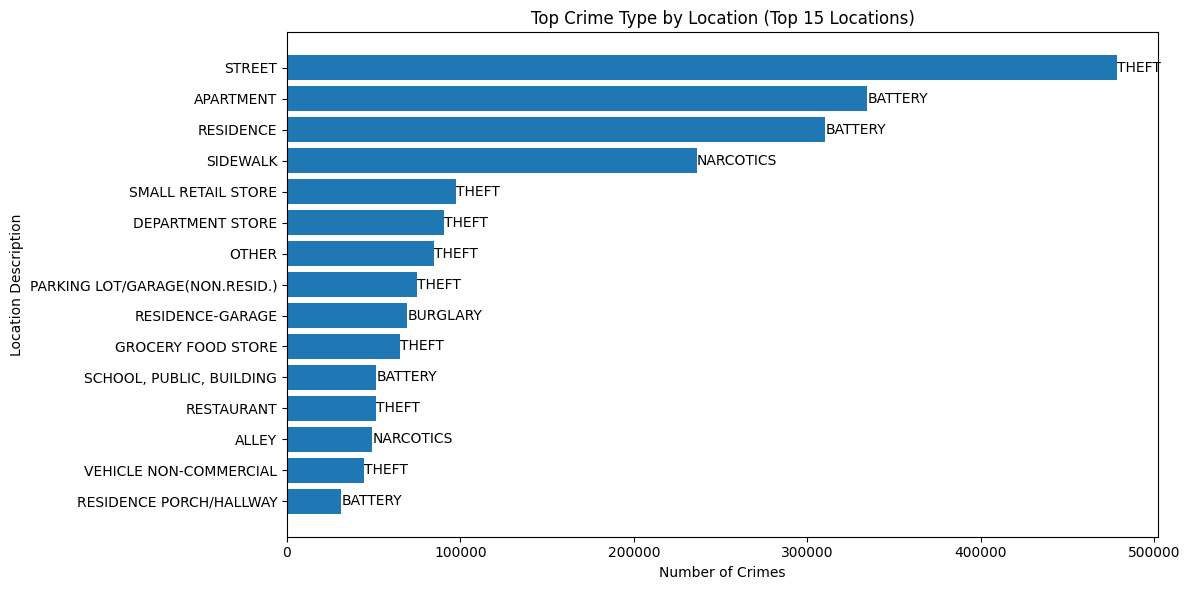

In [45]:
crime_by_location = crime.groupby(['Location Description', 'Primary Type']).size().reset_index(name='Count')

top_crime_per_location = crime_by_location.loc[crime_by_location.groupby('Location Description')['Count'].idxmax()]

top_crime_per_location = top_crime_per_location.sort_values(by='Count', ascending=False).head(15)

plt.figure(figsize=(12,6))
plt.barh(top_crime_per_location['Location Description'], top_crime_per_location['Count'])
for i, (ptype, count) in enumerate(zip(top_crime_per_location['Primary Type'], top_crime_per_location['Count'])):
    plt.text(count, i, f"{ptype}", va='center')
plt.title("Top Crime Type by Location (Top 15 Locations)")
plt.xlabel("Number of Crimes")
plt.ylabel("Location Description")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

<hr>
<h2>Question 13: How do trends in Motor Vehicle Theft compare with Burglary and Theft over time? Do they rise and fall together, or does vehicle theft follow a unique pattern? </h2>

In [47]:
vehicle_vs_property = crime[crime['Primary Type'].isin(['MOTOR VEHICLE THEFT','BURGLARY','THEFT'])]

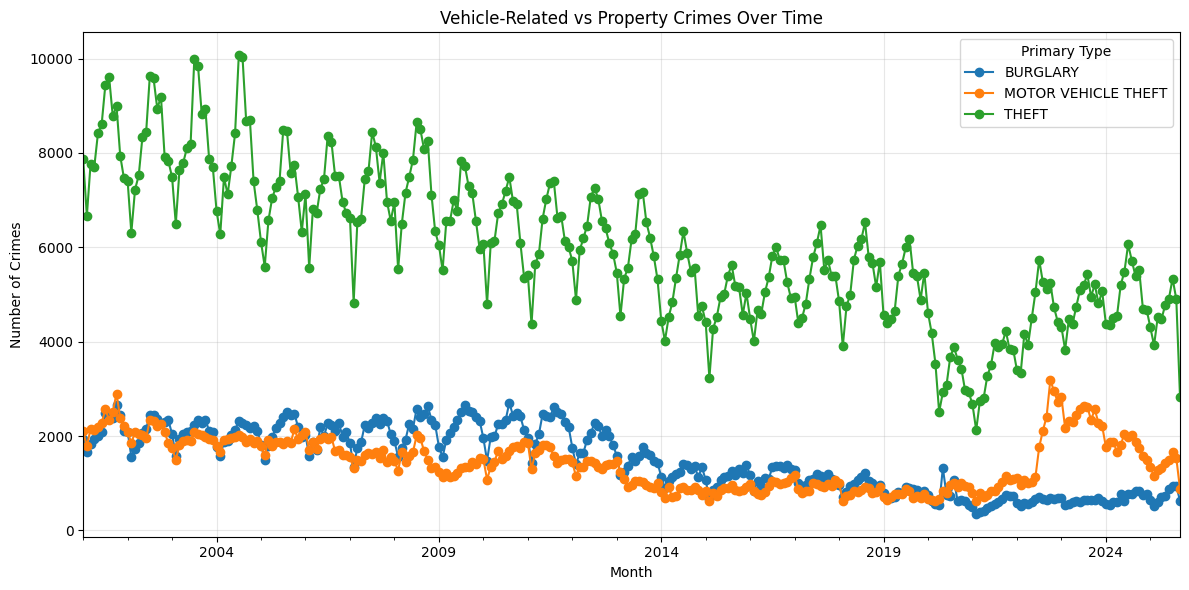

Primary Type,BURGLARY,MOTOR VEHICLE THEFT,THEFT
Date,,,
2025-05-01,734,1422,4776
2025-06-01,872,1497,4911
2025-07-01,950,1662,5337
2025-08-01,945,1538,4902
2025-09-01,629,880,2836


In [48]:
crime_trend = vehicle_vs_property.groupby([vehicle_vs_property['Date'].dt.to_period('M'), 'Primary Type']).size().unstack(fill_value=0)
crime_trend.index = crime_trend.index.to_timestamp()

crime_trend.plot(figsize=(12,6), marker='o')
plt.title("Vehicle-Related vs Property Crimes Over Time")
plt.xlabel("Month")
plt.ylabel("Number of Crimes")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

<hr>
<h2>Question 14: Which crimes are most likely to lead to an arrest, and which ones are least likely? </h2>

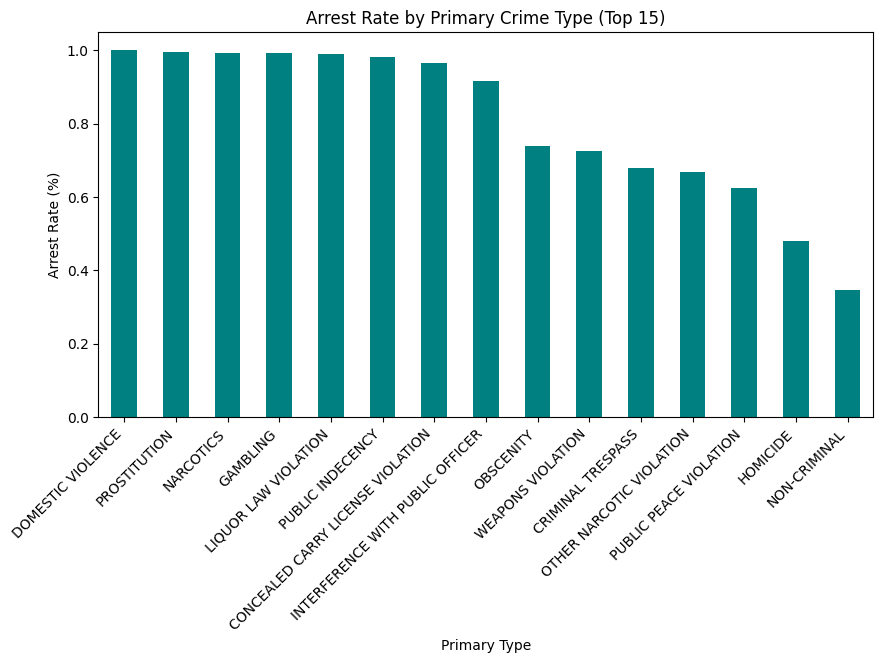

In [55]:
arrest_rate = crime.groupby('Primary Type')['Arrest'].mean().sort_values(ascending=False).head(15)

plt.figure(figsize=(10,5))
arrest_rate.plot(kind='bar', color='teal')
plt.title("Arrest Rate by Primary Crime Type (Top 15)")
plt.ylabel("Arrest Rate (%)")
plt.xticks(rotation=45, ha='right')
plt.show()

<hr>
<h2>Question 15: At what time of day do most crimes occur, and when are crimes least frequent? </h2>

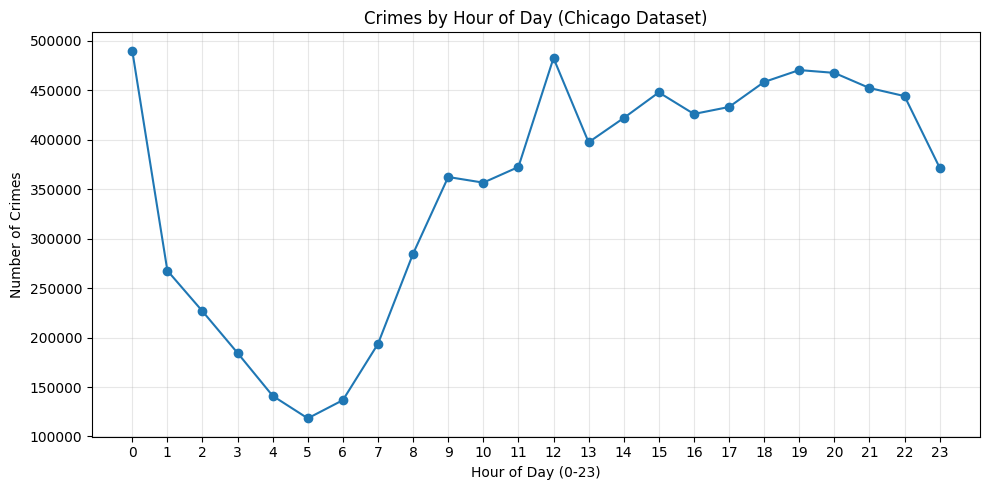

In [57]:
crimes_by_hour = crime['Hour'].value_counts().sort_index()

plt.figure(figsize=(10,5))
plt.plot(crimes_by_hour.index, crimes_by_hour.values, marker='o')
plt.title("Crimes by Hour of Day (Chicago Dataset)")
plt.xlabel("Hour of Day (0-23)")
plt.ylabel("Number of Crimes")
plt.grid(alpha=0.3)
plt.xticks(range(0,24))
plt.tight_layout()
plt.show()

<hr>
<h2>Question 16: Has the proportion of arrests for crimes missing Community Area changed over the years? </h2>

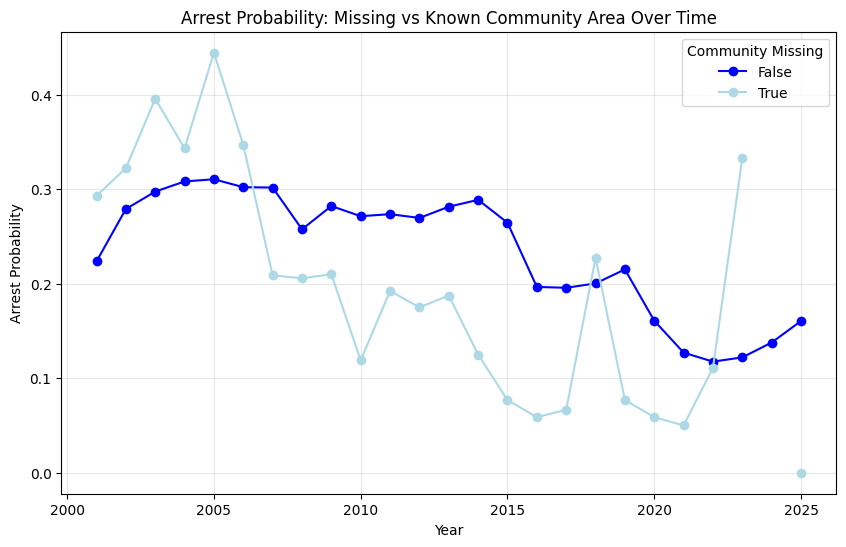

In [61]:
crime['Community Missing'] = crime['Community Area'].isnull()
trend = crime.groupby(['Year','Community Missing'])['Arrest'].mean().unstack()

trend.plot(marker='o', figsize=(10,6), color=["Blue","lightblue"])
plt.title("Arrest Probability: Missing vs Known Community Area Over Time")
plt.ylabel("Arrest Probability")
plt.grid(alpha=0.3)
plt.show()

<hr>
<h2>Question 17: Which blocks recorded the most Motor Vehicle Thefts? </h2>

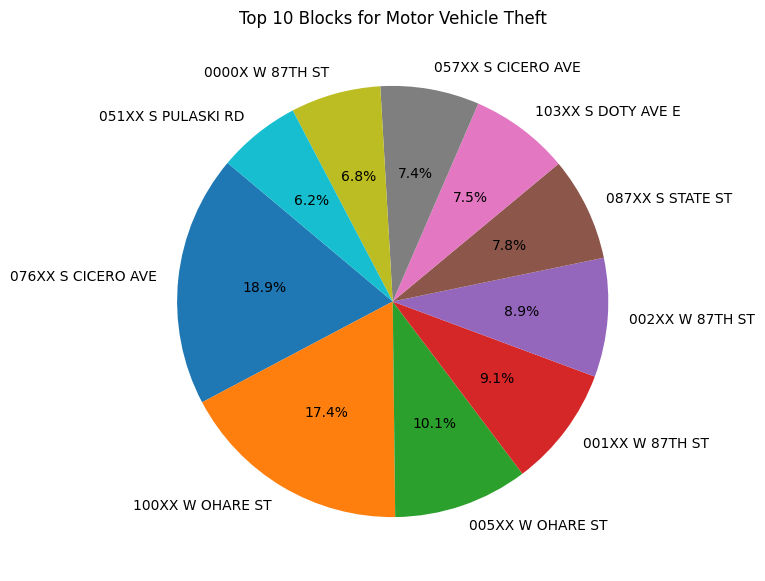

In [68]:
mvt_blocks = crime[crime['Primary Type'] == 'MOTOR VEHICLE THEFT']['Block'].value_counts().head(10)
plt.figure(figsize=(7,7))
plt.pie(mvt_blocks, labels=mvt_blocks.index, autopct='%1.1f%%', startangle=140)
plt.title("Top 10 Blocks for Motor Vehicle Theft")
plt.show()

<hr>
<h2>Question 18: Which FBI Code recorded the most Human Trafficking cases? </h2>

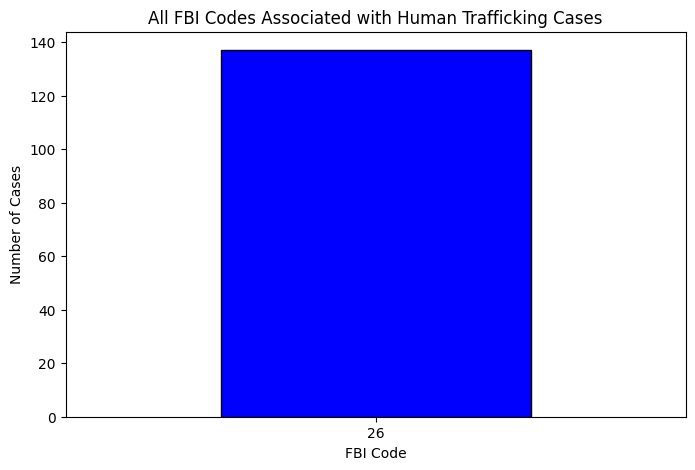

FBI Code
26    137
Name: count, dtype: int64


In [76]:
ht_fbi = crime[crime['Primary Type'] == 'HUMAN TRAFFICKING']['FBI Code'].value_counts()

plt.figure(figsize=(8,5))
ht_fbi.plot(kind='bar', color="blue", edgecolor="black")

plt.title("All FBI Codes Associated with Human Trafficking Cases")
plt.xlabel("FBI Code")
plt.ylabel("Number of Cases")
plt.xticks(rotation=0)
plt.show()

print(ht_fbi)

<hr>
<h2>Question 19: Which crime types most often happen in Hotels and Motels?</h2>

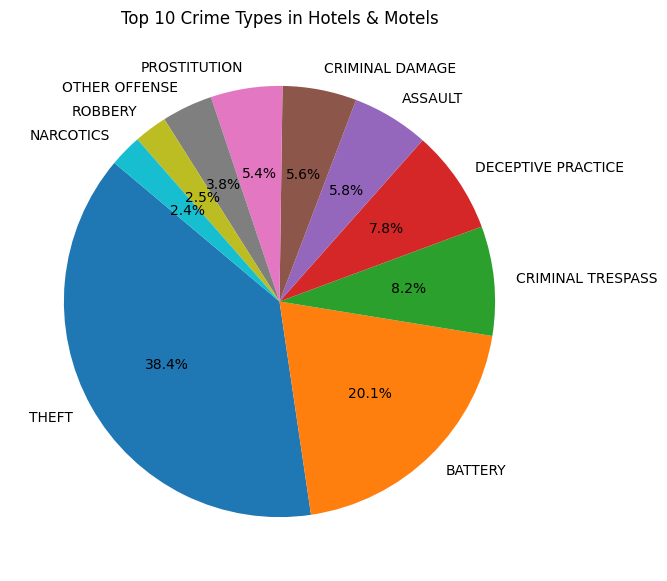

In [77]:
hotel_motel_crimes = crime[crime['Location Description'].str.contains("HOTEL|MOTEL", na=False)]

hotel_motel_types = hotel_motel_crimes['Primary Type'].value_counts().head(10)

plt.figure(figsize=(7,7))
plt.pie(hotel_motel_types, labels=hotel_motel_types.index, autopct='%1.1f%%', startangle=140)
plt.title("Top 10 Crime Types in Hotels & Motels")
plt.show()

<hr>
<h2>Question 20: Which crimes are the least frequent in Chicago?</h2>

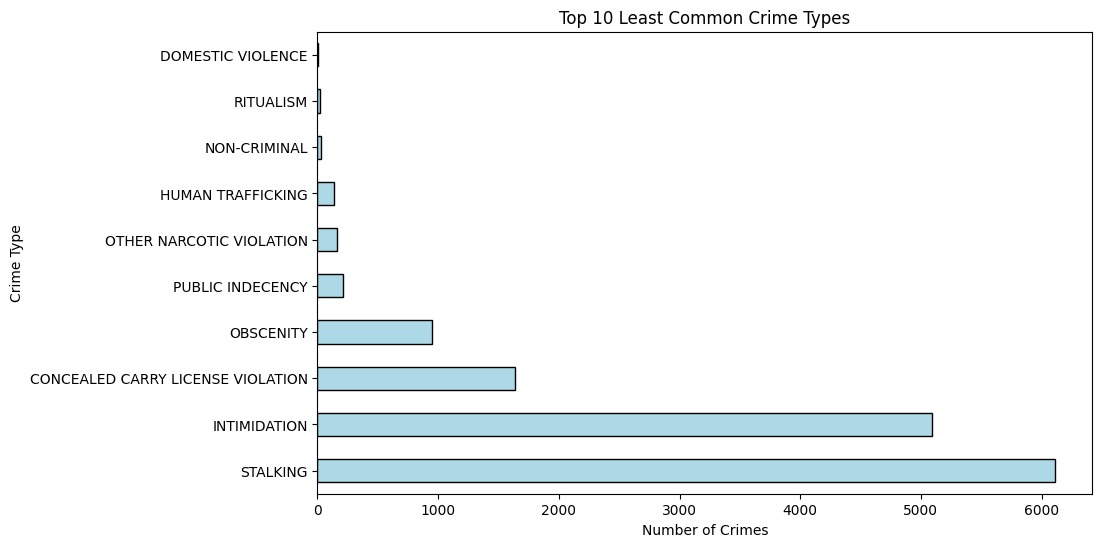

Rarest Crime Types in Dataset:
Primary Type
STALKING                             6115
INTIMIDATION                         5088
CONCEALED CARRY LICENSE VIOLATION    1633
OBSCENITY                             950
PUBLIC INDECENCY                      215
OTHER NARCOTIC VIOLATION              163
HUMAN TRAFFICKING                     137
NON-CRIMINAL                           26
RITUALISM                              24
DOMESTIC VIOLENCE                       1
Name: count, dtype: int64


In [82]:
least_crimes = crime['Primary Type'].value_counts().tail(10)

plt.figure(figsize=(10,6))
least_crimes.plot(kind='barh', color="lightblue", edgecolor="black")
plt.title("Top 10 Least Common Crime Types")
plt.xlabel("Number of Crimes")
plt.ylabel("Crime Type")
plt.show()

print("Rarest Crime Types in Dataset:")
print(least_crimes)